## ECE 661 Project: Plotting

In [17]:
import os

import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
def load_csv_as_array(file_path):
    data = pd.read_csv(file_path)
    if 'Step' in data.columns and 'Value' in data.columns:
        steps = data['Step'].values
        values = data['Value'].values
        
        result_array = np.column_stack((steps, values))
        return result_array
    else:
        raise ValueError("CSV does not contain 'step' and 'value' columns")

In [19]:
fid = {}
wasserstein = {}

for model in ['GAN', 'WGAN', 'WGAN-GP']:
    fid_path = os.path.join('results', 'tensorboard', f'{model}_fid.csv')
    print(fid_path)
    fid[model] = load_csv_as_array(fid_path)
    
    if model == 'WGAN' or model == 'WGAN-GP':
        wasserstein_path = os.path.join('results', 'tensorboard', f'{model}_Wasserstein.csv')
        print(wasserstein_path)
        wasserstein[model] = load_csv_as_array(wasserstein_path)

print(fid)
print(wasserstein)

results\tensorboard\GAN_fid.csv
results\tensorboard\WGAN_fid.csv
results\tensorboard\WGAN_Wasserstein.csv
results\tensorboard\WGAN-GP_fid.csv
results\tensorboard\WGAN-GP_Wasserstein.csv
{'GAN': array([[  0.        , 394.90609741],
       [  1.        , 356.35061646],
       [  2.        , 347.79718018],
       [  3.        , 316.50082397],
       [  4.        , 307.83789062],
       [  5.        , 292.07394409],
       [  6.        , 242.40325928],
       [  7.        , 223.73348999],
       [  8.        , 213.76020813],
       [  9.        , 180.71417236],
       [ 10.        , 182.36720276],
       [ 11.        , 172.98445129],
       [ 12.        , 173.08486938],
       [ 13.        , 149.51573181],
       [ 14.        , 179.68269348],
       [ 15.        , 157.6234436 ],
       [ 16.        , 153.01403809],
       [ 17.        , 189.40486145],
       [ 18.        , 153.22239685],
       [ 19.        , 132.75260925],
       [ 20.        , 143.00111389],
       [ 21.        , 135.417

## Plot Function

In [22]:
def plot_fid_scores(data):
    plt.figure(figsize=(10, 6))
    for key, values in data.items():
        epochs = values[:, 0]
        scores = values[:, 1]
        plt.plot(epochs, scores, label=f'{key} FID')
    
    plt.title('FID Scores by Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('FID Score')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.savefig('FID_scores_plot.png')
    plt.show()


def plot_wasserstein_distances(data):
    for key, values in data.items():
        plt.figure(figsize=(10, 6))
        epochs = values[:, 0]
        distances = values[:, 1]
        plt.plot(epochs, distances, label=f'{key} Wasserstein Distance')
        
        plt.title(f'Wasserstein Distance for {key}')
        plt.xlabel('Step')
        plt.ylabel('Wasserstein Distance')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'Wasserstein_distance_{key}.png')  # Save each plot to a file
        plt.show()

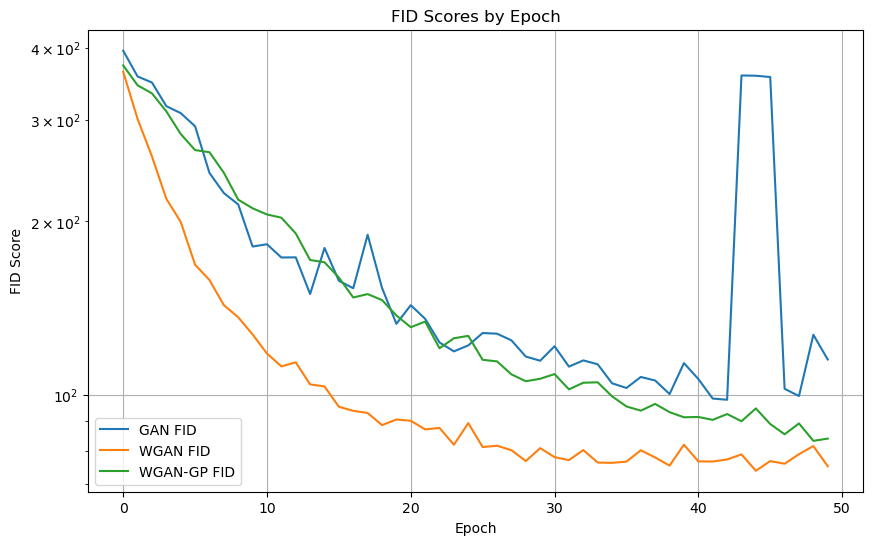

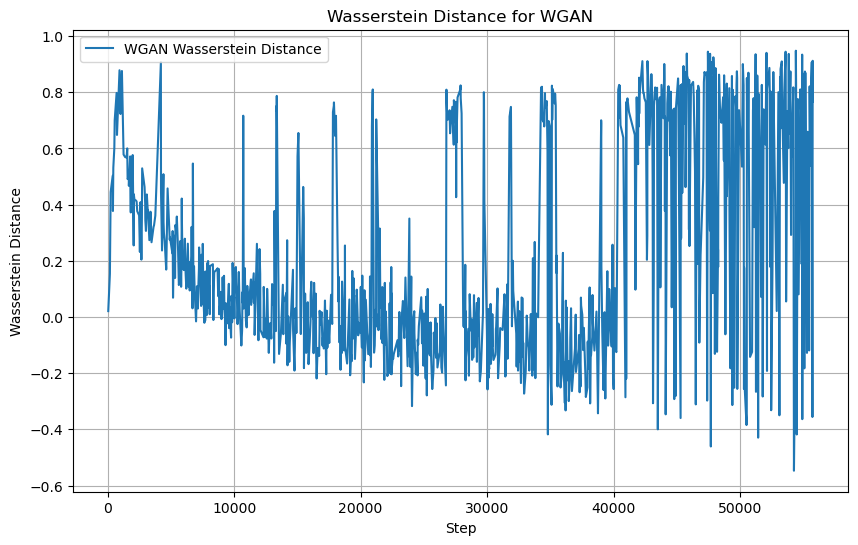

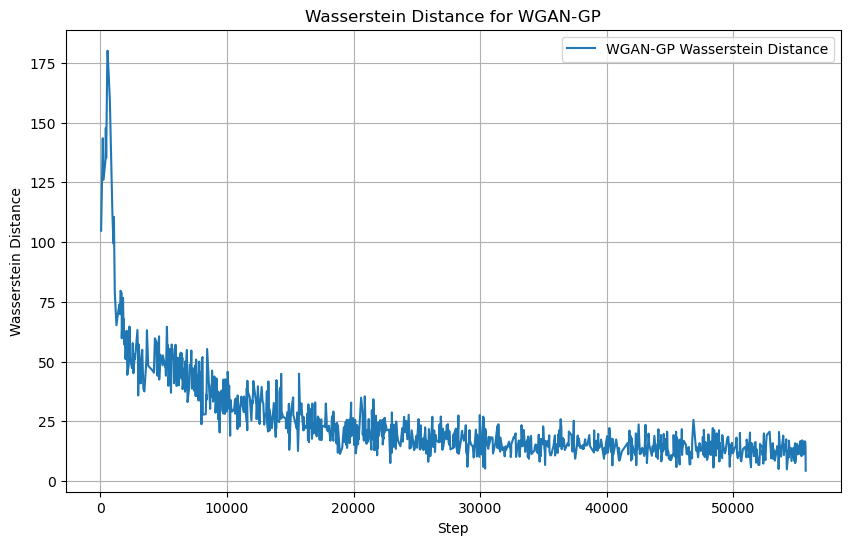

In [23]:
plot_fid_scores(fid)
plot_wasserstein_distances(wasserstein)